# Projeto 1 - Ciência dos Dados

Nome: Isadora Stigliani Dalberto

## Pergunta (s) a ser respondida

Os países que entraram no SADC (Comunidade para o Desenvolvimento da África Austral) em 1992 tiveram um aumento no seu PIB superior aos países da África que não entraram? Além do PIB, a expectativa de vida também aumentou proporcionalmente?

**Anos de interesse:**

>de 1971 até 1991 - 20 anos antes de existir o SADC
 
>de 1992 até 2010 - 20 anos após o SADC existir

## Explicação da hipótese e mecanismo

Os países que entraram na SADC tiveram seu PIB mais elevado do que os países da África que não pertencem ao grupo pois, por ser uma organização que tem como objetivo estimular o comércio de produtos e serviços entre os países membros, há uma maior exportação e melhoria na economia do grupo como um todo. Quanto a expectativa de vida, é esperado que a mesma também aumente com o passar dos anos, já que a organização visa diminuir a pobreza da população de todos os países membros e melhorar a qualidade de vida, acarretando no aumento da Expectativa de Vida.

Não foram encontradas referências que embaze dizer que a hipótese é crível.

## Bases de dados usadas

https://www.gapminder.org/data/documentation/gd004/  - Variável de interesse: Expectativa de Vida   
https://data.worldbank.org/indicator/NY.GDP.MKTP.KD  - Variável de interesse: PIB 

## Análise de dados

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["lines.markersize"] = 15

**Lê os dados que serão utilizados no projeto**

In [3]:
dados = pd.read_excel('total_gdp_us_inflation_adjusted.xlsx')
vida = pd.read_excel('life_expectancy_years.xlsx')

**Conversão de Índice**

In [4]:
dados_indice = dados.set_index("country")
vida_indice = vida.set_index("country")

**Listas utilizadas**

In [5]:
af_aus = ["Angola", "South Africa", "Botswana", "Congo, Dem. Rep.", "Lesotho", "Madagascar", "Malawi", "Mauritius", "Mozambique", "Namibia", "Swaziland", "Tanzania", "Zambia", "Zimbabwe"]
af_nao_aus = ["Benin", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Congo, Rep.", "Djibouti", "Eritrea", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Niger", "Nigeria", "Rwanda", "Senegal", "Seychelles", "Sierra Leone", "Sudan", "Togo", "Uganda" ]

anos = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
anos_1 = [1971, 1972,1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991]
anos_2 = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

**Criação das colunas "AF_AUS" e "AF_NAO_AUS"**

* A coluna AF_AUS com valor 1 indica que o país é membro do SADC
* A coluna AF_NAO_AUS com valor 1 indica que o país pertence a áfrica porém não faz parte do SADC

In [6]:
dados_indice.loc[:, "AF_AUS"] = 0      #criar uma coluna chamada AF_AUS e falar que todos os países são 0
dados_indice.loc[af_aus,"AF_AUS"]=1    #falar que todos os países da lista af_aus recebem o valor de 1 na coluna AF_AUS

dados_indice.loc[:, "AF_NAO_AUS"] = 0     #criar uma coluna chamada AF_NAO_AUS e falar que todos os países são 0
dados_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1   #falar que todos os países da lista af_nao_aus recebem o valor de 1 na coluna AF_NAO_AUS

vida_indice.loc[:, "AF_AUS"] = 0
vida_indice.loc[af_aus,"AF_AUS"]=1

vida_indice.loc[:, "AF_NAO_AUS"] = 0
vida_indice.loc[af_nao_aus,"AF_NAO_AUS"]=1

**Separação dos dados**

In [7]:
dados_af_aus = dados_indice.loc[af_aus]     #PIB de todos os paises que sao do SADC

dados_af_nao_aus = dados_indice.loc[af_nao_aus]     #PIB de todos os paises que sao da africa mas nao sao da SADC

vida_af_aus = vida_indice.loc[af_aus]     #ExpVida de todos os paises que sao do SADC

vida_af_nao_aus = vida_indice.loc[af_nao_aus]     #ExpVida de todos os paises que sao da africa mas nao sao da SADC

africa = af_aus + af_nao_aus     #definição do que é africa = soma das duas listas

dados_africa = dados_indice.loc[africa]     #PIB de todos os paises da áfrica

vida_africa = vida_indice.loc[africa]     #ExpVida de todos os paises da áfrica

**Limitação de período de tempo**

In [8]:
transpor_aus = dados_af_aus.transpose()
transpor_quant_aus = transpor_aus[:-2]

aus_anos1 = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<1992),:].transpose()
soma_aus_anos1 = aus_anos1.sum() #soma POR ANO

aus_anos2 = transpor_quant_aus.loc[(transpor_quant_aus.index>1991) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos2 = aus_anos2.sum() #soma POR ANO

aus_anos_total = transpor_quant_aus.loc[(transpor_quant_aus.index>1970) & (transpor_quant_aus.index<2013),:].transpose()
soma_aus_anos_total = aus_anos_total.sum()

In [9]:
transpor_nao_aus = dados_af_nao_aus.transpose()
transpor_quant_nao_aus = transpor_nao_aus[:-2]

nao_aus_anos1 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<1992),:].transpose()
soma_nao_aus_anos1 = nao_aus_anos1.sum()

nao_aus_anos2 = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1991) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos2 = nao_aus_anos2.sum()

nao_aus_anos_total = transpor_quant_nao_aus.loc[(transpor_quant_nao_aus.index>1970) & (transpor_quant_nao_aus.index<2013),:].transpose()
soma_nao_aus_anos_total = nao_aus_anos_total.sum()

In [10]:
transpor = dados_africa.transpose()
transpor_quant = transpor[:-2]

africa_anos1 = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<1992),:].transpose()
soma_africa_anos1 = africa_anos1.sum()

africa_anos2 = transpor_quant.loc[(transpor_quant.index>1991) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos2 = africa_anos2.sum()

africa_anos_total = transpor_quant.loc[(transpor_quant.index>1970) & (transpor_quant.index<2013),:].transpose()
soma_africa_anos_total = africa_anos_total.sum()

**Criação das colunas "AF_AUS" e "AF_NAO_AUS" para a tabela "africa_anos_total"**

In [11]:
africa_anos_total.loc[:, "AF_AUS"] = 0
africa_anos_total.loc[af_aus,"AF_AUS"]=1

africa_anos_total.loc[:, "AF_NAO_AUS"] = 0
africa_anos_total.loc[af_nao_aus,"AF_NAO_AUS"]=1

Para o ínicio da análise, foi plotado o gráfico do PIB ao longo do tempo para ter uma noção do comportamento, auxiliando na continuação do raciocínio.

**Gráfico do PIB de 1971 até 2012**

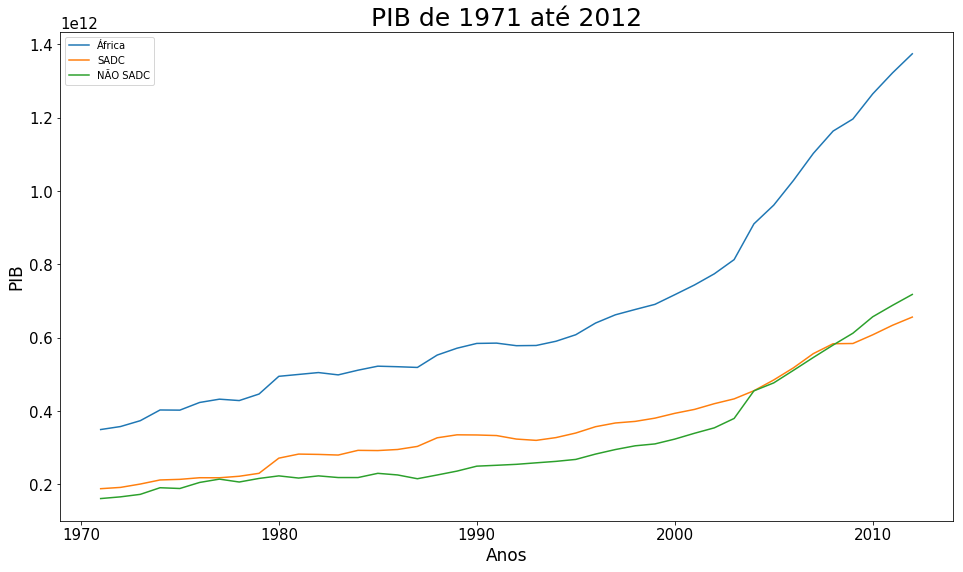

In [12]:
plt.plot(anos, soma_africa_anos_total, label="África")
plt.plot(anos, soma_aus_anos_total, label="SADC")
plt.plot(anos, soma_nao_aus_anos_total, label="NÃO SADC")
plt.xlabel("Anos")
plt.ylabel("PIB")
plt.title("PIB de 1971 até 2012")
plt.legend()
plt.show()

A fim de descobrir a relação por país, o PIB médio em função do tempo foi plotado para descobrir qual grupo (SADC ou não pertencentes) havia um maior pib médio

**Gráfico do PIB Médio em função do tempo**

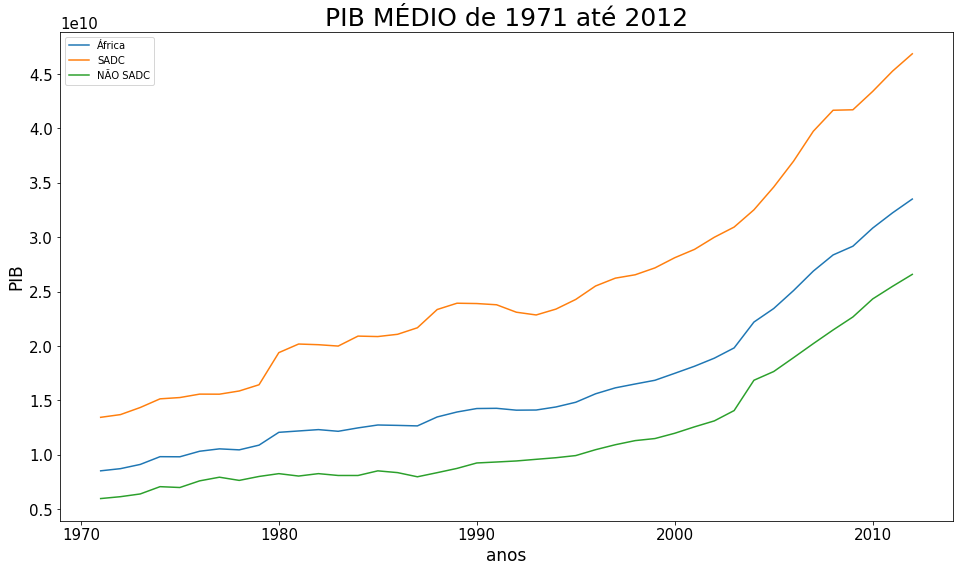

In [13]:
plt.plot(anos, soma_africa_anos_total/41, label="África")
plt.plot(anos, soma_aus_anos_total/14, label="SADC" )
plt.plot(anos, soma_nao_aus_anos_total/27, label="NÃO SADC")
plt.xlabel("anos")
plt.ylabel("PIB")
plt.title("PIB MÉDIO de 1971 até 2012")
plt.legend()
plt.show()

De acordo com os gráficos plotados, é possível perceber que entre 2000 e 2010 o pib dos dois grupos basicamente se iguala, entretanto o segundo gráfico plotado indica que, apesar deles serem quase iguais nesse intervalo de tempo, os países do SADC possuem pib médio superior, em outras palavras, provavelmente os não pertencentes possuem maior disparidade entre seus integrantes, fazendo que no total se iguale ao SADC mas quando calculado por país, perca para o SADC. 

**Retirada de países sem dados e filtragem do ano**

In [14]:
dados_af_nao_aus_retirada = dados_af_nao_aus.dropna()
dados_af_aus_retirada = dados_af_aus.dropna()
vida_af_nao_aus_retirada = vida_af_nao_aus.dropna()
vida_af_aus_retirada = vida_af_aus.dropna()

In [15]:
af_aus_1972 = dados_af_aus_retirada[1972]
af_nao_aus_1972 = dados_af_nao_aus_retirada[1972]
af_aus_2010 = dados_af_aus_retirada[2010]
af_nao_aus_2010 = dados_af_nao_aus_retirada[2010]
vida_af_aus_2010 = vida_af_aus_retirada[2010]
vida_af_nao_aus_2010 = vida_af_nao_aus_retirada[2010]
vida_af_aus_1972 = vida_af_aus_retirada[1972]
vida_af_nao_aus_1972 = vida_af_nao_aus_retirada[1972]

af_aus_1972.rename("PIB 1972", inplace=True)
af_nao_aus_1972.rename("PIB 1972", inplace=True)
af_aus_2010.rename("PIB 2010", inplace=True)
af_nao_aus_2010.rename("PIB 2010", inplace=True)
vida_af_aus_2010.rename("ExpVida 2010", inplace=True)
vida_af_nao_aus_2010.rename("ExpVida 2010", inplace=True)
vida_af_aus_1972.rename("ExpVida 1972", inplace=True)
vida_af_nao_aus_1972.rename("ExpVida 1972", inplace=True)

print()

**Join das tabelas de PIB e Expectativa de Vida em 2010 e 1972**

In [16]:
comp_2010_af_nao_aus = pd.concat([af_nao_aus_2010, vida_af_nao_aus_2010], axis=1, sort=True)

comp_1972_af_nao_aus = pd.concat([af_nao_aus_1972, vida_af_nao_aus_1972], axis=1, sort=True)

comp_2010_af_aus = pd.concat([af_aus_2010, vida_af_aus_2010], axis=1, sort=True)
comp_1972_af_aus = pd.concat([af_aus_1972, vida_af_aus_1972], axis=1, sort=True)

comp_1972_all = pd.concat([comp_1972_af_aus, comp_1972_af_nao_aus], axis=1, sort=True)
comp_2010_all = pd.concat([comp_2010_af_aus, comp_2010_af_nao_aus], axis=1, sort=True)

pib_af_aus = pd.concat([af_aus_1972, af_aus_2010], axis=1, sort=True)
pib_af_nao_aus = pd.concat([af_nao_aus_1972, af_nao_aus_2010], axis=1, sort=True)

vida_af_aus_concat = pd.concat([vida_af_aus_1972, vida_af_aus_2010], axis=1, sort=True)
vida_af_nao_aus = pd.concat([vida_af_nao_aus_1972, vida_af_nao_aus_2010], axis=1, sort=True)

Para refinar o que foi dito anteriormente, foi feito a análise por país sob as mesmas condições: PIB x ano

**Gráfico do PIB ao longo do período de estudo dos países pertencentes a SADC**

C:\Users\dorad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


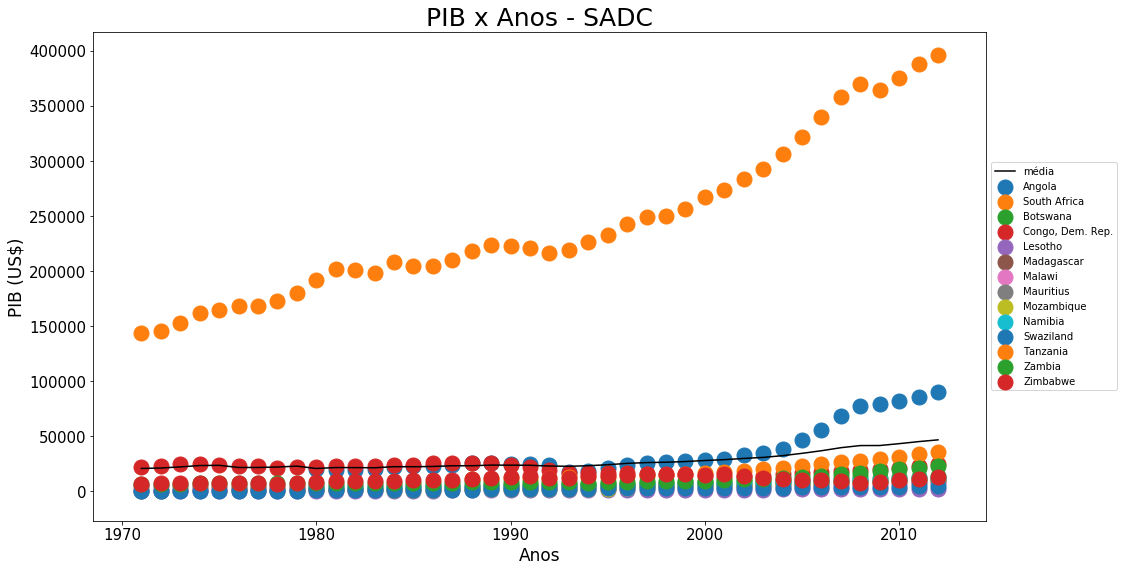

In [36]:
aus_anos_total_t = aus_anos_total.T
medias_aus_anos_total_t = aus_anos_total.mean()
for pais in aus_anos_total_t.columns:
    plt.scatter(x=aus_anos_total_t.index, y=aus_anos_total_t[pais]/1000000)
    
ax = plt.subplot(111)

plt.plot(medias_aus_anos_total_t.index, medias_aus_anos_total_t/1000000, color="black", label="média")
plt.xlabel("Anos")
plt.ylabel("PIB (US$)")
plt.title("PIB x Anos - SADC")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Este gráfico indica que, ao contrário do que foi pensado, o SADC possui sim uma disparidade elevada, em que a África do Sul (South Africa) basicamente faz com que a média de todos os países suba.

Para melhor vizualizaçao do PIB nos demais países, o eixo Y foi colocado em escala logarítima:

C:\Users\dorad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


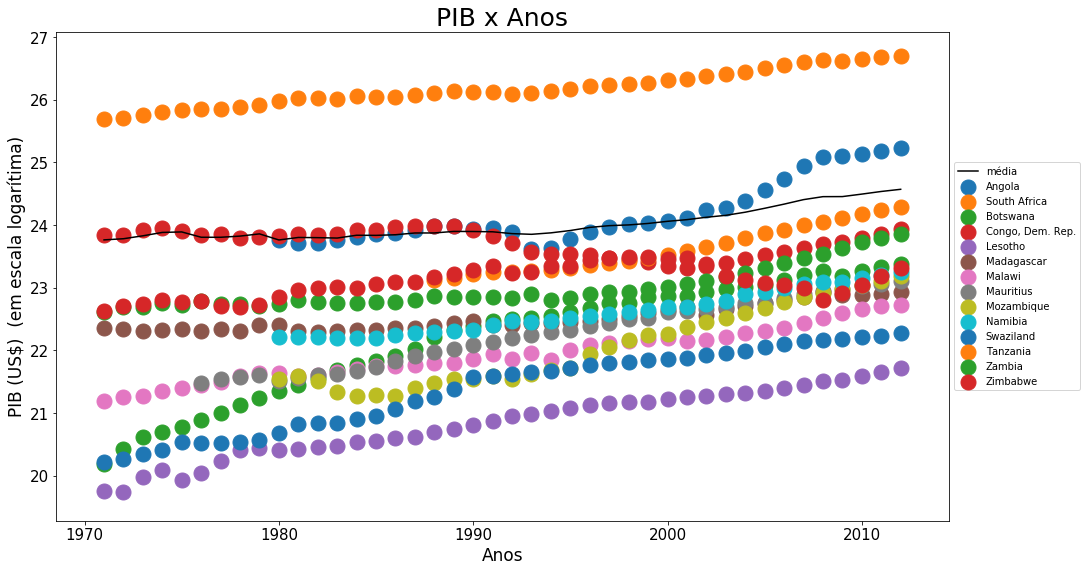

In [35]:
aus_anos_total_t = aus_anos_total.T
medias_aus_anos_total_t = aus_anos_total.mean()
for pais in aus_anos_total_t.columns:
    plt.scatter(x=aus_anos_total_t.index, y=(np.log(aus_anos_total_t[pais])))
    
ax = plt.subplot(111)

plt.plot(medias_aus_anos_total_t.index, (np.log(medias_aus_anos_total_t)), color="black", label="média")
plt.xlabel("Anos")
plt.ylabel("PIB (US$)  (em escala logarítima)")
plt.title("PIB x Anos")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Com esses gráficos de PIB x Tempo é possível perceber que a África do Sul é o país da SADC que possui o maior PIB, e que a Angola obteve o 2° maior PIB

O mesmo processo foi realizado para os países da África que não pertencem ao SADC.

**Gráfico do PIB ao longo do período de estudo para os países da África que não pertencem a SADC**

C:\Users\dorad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


[]

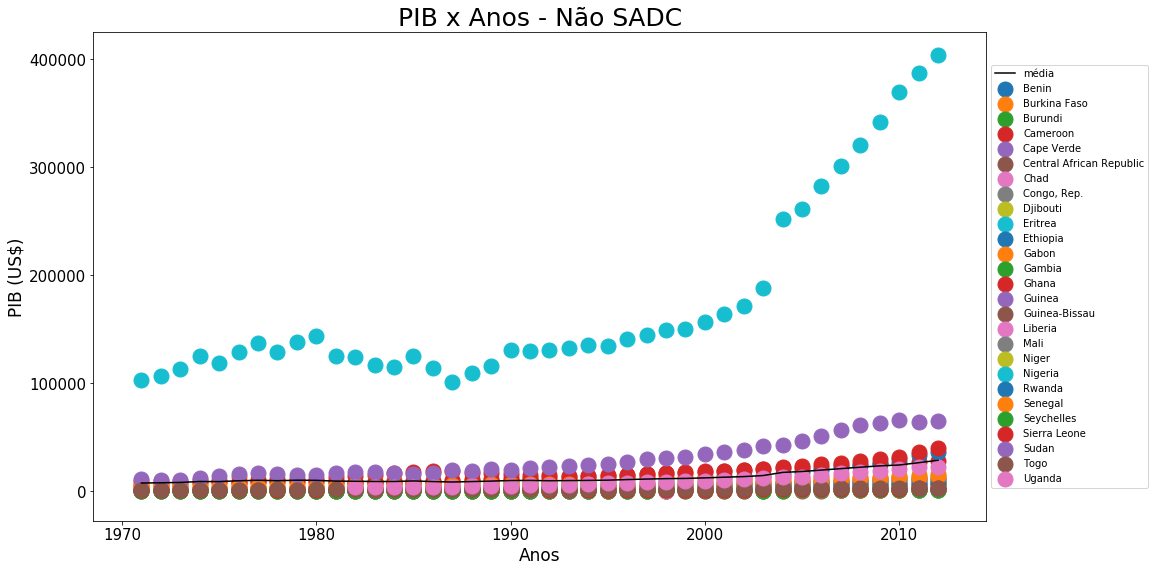

In [34]:
sem_nigeria = nao_aus_anos_total.drop(labels=[])
nao_aus_anos_total_t = sem_nigeria.T
medias_nao_aus_anos_total_t = sem_nigeria.mean()
for pais in nao_aus_anos_total_t.columns:
    plt.scatter(x=nao_aus_anos_total_t.index, y=nao_aus_anos_total_t[pais]/1000000)
    
ax = plt.subplot(111)

plt.plot(medias_nao_aus_anos_total_t.index, medias_nao_aus_anos_total_t/1000000, color="black", label="média")
plt.xlabel("Anos")
plt.ylabel("PIB (US$)")
plt.title("PIB x Anos - Não SADC")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

Este gráfico mostra que há uma grande disparidade entre a Nigéria e os demais países, em que a disparidade entre a Nigéria e os demais paises fosse aproximadamente igual a disparidade da África do Sul com os países da SADC no mesmo período de tempo, variando de USS 100000 a USS 300000.

Para melhor visualização dos dados dos outros países, o eixo Y foi colocado em escala Logarítima.

C:\Users\dorad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


[]

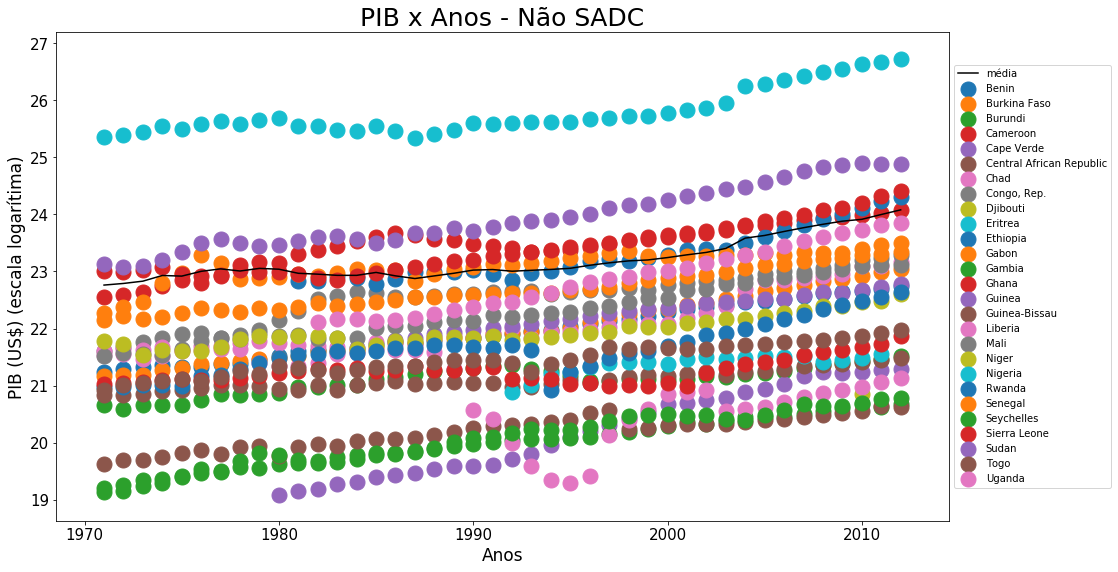

In [33]:
sem_nigeria = nao_aus_anos_total.drop(labels=[])
nao_aus_anos_total_t = sem_nigeria.T
medias_nao_aus_anos_total_t = sem_nigeria.mean()
for pais in nao_aus_anos_total_t.columns:
    plt.scatter(x=nao_aus_anos_total_t.index, y=(np.log(nao_aus_anos_total_t[pais])))
    
ax = plt.subplot(111)

plt.plot(medias_nao_aus_anos_total_t.index, np.log(medias_nao_aus_anos_total_t), color="black", label="média")
plt.xlabel("Anos")
plt.ylabel("PIB (US$) (escala logarítima)")
plt.title("PIB x Anos - Não SADC")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot()

Após a análise dos dados feita anteriormente, foi necessário ver quais foram os aumentos percentuais para que a pergunta pudesse ser respondida com maior clareza.

**Cálculo dos aumentos percentuais**

In [24]:
print()
print()
print("PIB médio nos paises pertencentes a SADC:")
pib_medio_af_aus = pib_af_aus.sum()/len(pib_af_aus)
print(pib_medio_af_aus)
print()
print("Aumento percentual do PIB médio entre os países pertencentes a SADC:")
aumento_pib_af_aus = (pib_medio_af_aus[1] * 100 )/(pib_medio_af_aus[0]) - 100
print("{0} %".format(aumento_pib_af_aus))
print()
print()

print("PIB médio nos paises não pertencentes a SADC:")
pib_medio_af_nao_aus = pib_af_nao_aus.sum()/len(pib_af_nao_aus) 
print(pib_medio_af_nao_aus)
print()
print("Aumento percentual do PIB médio entre os países não pertencentes a SADC:")
aumento_pib_af_nao_aus = (pib_medio_af_nao_aus[1] * 100)/(pib_medio_af_nao_aus[0]) -100
print("{0} %".format(aumento_pib_af_nao_aus))
print()
print()



PIB médio nos paises pertencentes a SADC:
PIB 1972    2.388250e+10
PIB 2010    5.723500e+10
dtype: float64

Aumento percentual do PIB médio entre os países pertencentes a SADC:
139.65246519417983 %


PIB médio nos paises não pertencentes a SADC:
PIB 1972    9.057944e+09
PIB 2010    3.235389e+10
dtype: float64

Aumento percentual do PIB médio entre os países não pertencentes a SADC:
257.18798108474454 %




Esta análise dos aumentos percentuais indica que ao contrário do que foi proposto na hipótese no inicio deste projeto, os países nao pertencentes ao SADC obtiveram um maior aumento percentual médio, de aproximadamente 257%, em que os países do SADC só conseguiram obter 139,6% de aumento em relação a 1972.

**Gráfico da Expectativa de Vida pelo PIB**

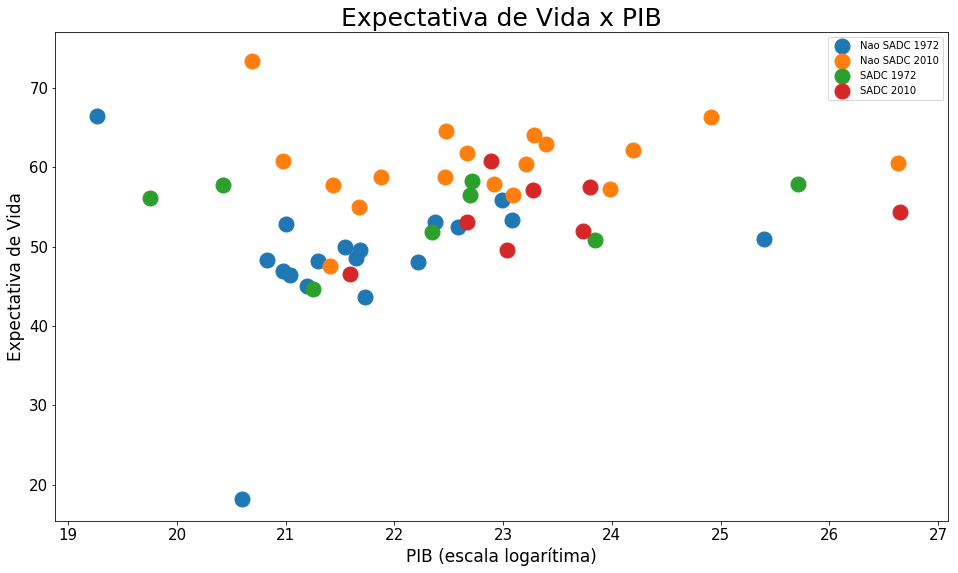

In [39]:
print()
plt.scatter(np.log(comp_1972_af_nao_aus["PIB 1972"]),comp_1972_af_nao_aus["ExpVida 1972"], label="Nao SADC 1972")
plt.scatter(np.log(comp_2010_af_nao_aus["PIB 2010"]), comp_2010_af_nao_aus["ExpVida 2010"], label="Nao SADC 2010")
plt.scatter(np.log(comp_1972_af_aus["PIB 1972"]),comp_1972_af_aus["ExpVida 1972"], label="SADC 1972")
plt.scatter(np.log(comp_2010_af_aus["PIB 2010"]), comp_2010_af_aus["ExpVida 2010"], label="SADC 2010")
plt.title("Expectativa de Vida x PIB")
plt.xlabel("PIB (escala logarítima)")
plt.ylabel("Expectativa de Vida")
plt.legend()
plt.show()
print()

A fim de calcular o aumento percentual da Expectativa de vida, foi repetido o mesmo procedimento realizado anteriormente com o PIB.

In [25]:
print("Expectativa de vida média nos países pertencentes a SADC:")
vida_media_af_aus = vida_af_aus_concat.sum()/len(vida_af_aus_concat)
print(vida_media_af_aus)
print()
print("Aumento percentual da Expectativa de Vida média nos paises pertencentes a SADC:")
aumento_vida_af_aus = (vida_media_af_aus[1] * 100)/(vida_media_af_aus[0]) -100
print("{0} %".format(aumento_vida_af_aus))
print()
print()

print("Expectativa de vida média nos países não pertencentes a SADC:")
vida_media_af_nao_aus = vida_af_nao_aus.sum()/len(vida_af_nao_aus)
print(vida_media_af_nao_aus)
print()
print("Aumento percentual da Expectativa de Vida média nos paises não pertencentes a SADC:")
aumento_vida_af_nao_aus = (vida_media_af_nao_aus[1] * 100)/(vida_media_af_nao_aus[0]) -100
print("{0} %".format(aumento_vida_af_nao_aus))
print()

Expectativa de vida média nos países pertencentes a SADC:
ExpVida 1972    54.114286
ExpVida 2010    55.985714
dtype: float64

Aumento percentual da Expectativa de Vida média nos paises pertencentes a SADC:
3.458289334741295 %


Expectativa de vida média nos países não pertencentes a SADC:
ExpVida 1972    48.925926
ExpVida 2010    60.774074
dtype: float64

Aumento percentual da Expectativa de Vida média nos paises não pertencentes a SADC:
24.21650264950793 %



A partir do gráfico Expectativa de vida x PIB, foi feito o mesmo gráfico novamente porém com os valores de média, assim como os coeficientes angulares e lineares.

**Gráfico de Expectativa de Vida pelo PIB com reta da média** 


Paises não participantes da SADC - 1972
cor: Azul
Coeficiente linear: 38.09467578270332
Coeficiente angular: 0.5034106386747718

Paises participantes da SADC - 1972
cor: Vermelha
Coeficiente linear: 45.80079783810477
Coeficiente angular: 0.3759923771164062

Paises não participantes da SADC - 2010
cor: Verde
Coeficiente linear: 66.23637406197354
Coeficiente angular: -0.24190108211672898

Paises participantes da SADC - 2010
cor: Amarelo
Coeficiente linear: 25.459730872999472
Coeficiente angular: 1.301445554969889


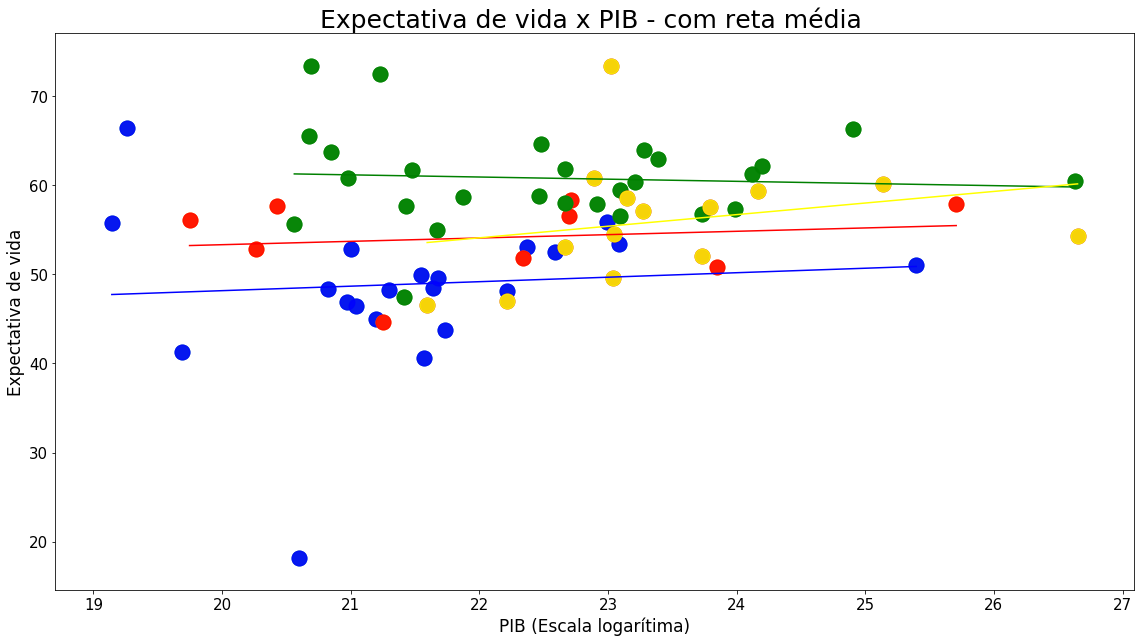

In [37]:
def reta(dados_x, dados_y, c, cor, texto):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print()
    print(texto)
    print(cor)
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
    
    plt.scatter(dados_x, dados_y, c=c, alpha=0.8)
    plt.title('1972')
    plt.xlabel('PIB')
    plt.ylabel('Expectativa de Vida')
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color=c)
    plt.tight_layout()

    
af_nao_aus_1972_2 = dados_af_nao_aus[1972]
vida_af_nao_aus_1972_2 = vida_af_nao_aus["ExpVida 1972"]

af_aus_1972_2 = dados_af_aus[1972]
vida_af_aus_1972_2 = vida_af_aus[1972]

af_nao_aus_2010_2 = dados_af_nao_aus[2010]
vida_af_nao_aus_2010_2 = vida_af_nao_aus["ExpVida 2010"]

af_aus_2010_2 = dados_af_aus[2010]
vida_af_aus_2010_2 = vida_af_aus[2010]


plt.scatter((np.log(af_nao_aus_1972_2)), vida_af_nao_aus_1972_2, label="Não SADC 1972")
reta((np.log(af_nao_aus_1972_2)), vida_af_nao_aus_1972_2, "blue", "cor: Azul", "Paises não participantes da SADC - 1972")

plt.scatter((np.log(af_aus_1972_2)), vida_af_aus_1972_2, label="SADC 1972")
reta((np.log(af_aus_1972_2)), vida_af_aus_1972_2, "red", "cor: Vermelha", "Paises participantes da SADC - 1972")

plt.scatter((np.log(af_nao_aus_2010_2)), vida_af_nao_aus_2010_2, label="Não SADC 2010")
reta((np.log(af_nao_aus_2010_2)), vida_af_nao_aus_2010_2, "green", "cor: Verde", "Paises não participantes da SADC - 2010")

plt.scatter((np.log(af_aus_2010_2)), vida_af_aus_2010_2, label="Não SADC 2010")
reta((np.log(af_aus_2010_2)), vida_af_aus_2010_2, "yellow", "cor: Amarelo", "Paises participantes da SADC - 2010")


plt.xlabel("PIB (Escala logarítima)")
plt.ylabel("Expectativa de vida")
plt.title("Expectativa de vida x PIB - com reta média ")
plt.show()
print()

De acordo com os valores de coeficientes angulares obtidos, é possivel concluir que os países do SADC foram os que tiveram maior coeficiente angular, e os não participantes obtiveram um coeficiente negativo, além de que, antes de o grupo SADC ser criado, ambos grupos de estudo possuiram coeficientes muito parecidos, o que indica que a criaçao do SADC obteve um resultado positivo sobre seus paises-membros.

## Conclusão

A Hipótese ditando que os países pertencentes ao SADC obtiveram um aumento percentual de seu PIB superior aos países da África que não pertencem ao bloco mostrou-se errônea, o que faz sentido já que não foi encontrado nenhum arquivo que diz que a hipótese fosse verdadeira. Entretando, quando se trata de valores absolutos, os Países da SADC, de fato, possuem valores superiores aos encontrados nos paises não pertencentes, porém, quando se trata de aumento percentual, os não pertencentes ao grupo se sobressaíram em relaçao ao outro grupo de estudo.

Quanto a expectativa de vida, o gráfico de dispersão com a reta da média indica que, dentre os grupos estudados, Os países participantes da SADC obtiveram um aumento na relação superior aos demais grupos, sendo que os países que não pertencem a SADC obtiveram um declínio na relação, fator que é comprovado de acordo com o coeficiente angular da reta, que neste caso obteve o valor de -0.24190108211672898. Portanto, não se pode dizer que a Expectativa de vida aumentou proporcionalmente ao PIB.

**Fontes:**
* https://www.suapesquisa.com/blocoseconomicos/sadc.htm
* https://mundoeducacao.bol.uol.com.br/geografia/sadc.htm
* https://brasilescola.uol.com.br/geografia/sadc.htm
* https://www.sadc.int/
* https://www.sadc.int/themes/economic-development/